<a href="https://colab.research.google.com/github/Algi21/Supervised-Learning---Regression/blob/main/Homework_Regression_InsightMinds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  2.0.2
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
# Link CSV Google Sheets
url = "https://docs.google.com/spreadsheets/d/1udQirplaI0mAGJnuZPlPHPaxr7RtisYt/export?format=csv&gid=1632283680"

# Baca file CSV
df = pd.read_csv(url)

# Tampilkan 5 baris sample
df.sample(5)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
4831,2017-12-10,Sambit Patra vs Kanhaiya Kumar Debate | Chaupa...,News18 India,25,10:27:00,"kanhaiya kumar|""kanhaiya kumar latest""|""kanhai...",497751,9540,888,9049,False,False,False,Chaupal 2017: न्‍यूज18 इंडिया द्वारा आयोजित ‘च...,21,1173,67,2017-12-07 00:00:00
8418,2017-12-29,Gali Janardhan Reddy About YS Rajasekhar Reddy...,ABN Telugu,25,10:17:33,"gali janardhan reddy|""gali janardhan reddy ope...",307813,1277,215,0,True,False,False,Gali Janardhan Reddy a famous Politician and R...,18,1532,95,2017-12-26 00:00:00
20863,2018-03-12,"JB Junction : പ്രിയ വാര്യര്‍, റോഷന്‍, ഒമര്‍ ലു...",KairaliOnline,24,11:49:27,"kairali tv|""kairali tv programmes""|""JB Junctio...",131035,659,349,161,False,False,False,"Watch winking girl of India, Priya Prakash war...",25,1366,95,2018-03-11 00:00:00
34154,2018-05-31,ખજુરભાઈ as પ્લાસ્ટીકવાળો - Khajurbhai ni moj -...,Khajur Bhai Ni Moj,23,06:41:31,"khajurbhai|""khajurbhai ni moj""|""khajur jigli""|...",339501,7827,352,419,False,False,False,khajurbhai ni cricket ni moj (IPL) - ખજુરભાઈ a...,14,204,67,2018-05-31 00:00:00
11601,2018-01-17,Ponnumkasavittu Official Video Song HD | Queen...,satyamvideos,10,13:25:15,"Queen|""New Malayalam Movie""|""Satyam Videos""|""S...",121486,2940,46,114,False,False,False,Song : Ponnumkasavittu....\nFilm : Queen \nSin...,5,1226,90,2018-01-16 00:00:00


# Exploratory Data Analysis

Definisi masing-masing kolom

● trending_date: tanggal ketika video trending <br>
● title: judul video<br>
● channel_title: nama channel<br>
● category_id: kategori video dalam label encoding<br>
● publish_time: waktu publish video<br>
● tags: tag yang digunakan pada video<br>
● views: jumlah views video<br>
● likes: jumlah likes video<br>
● dislikes: jumlah dislikes video<br>
● comment_count: jumlah komentar pada video<br>
● comments_disabled: apakah status komentar dinonaktifkan pada video<br>
● ratings_disabled: apakah rating dinonaktifkan pada video<br>
● video_error_or_removed: apakah video error atau sudah dihapus saat ini<br>
● description: deskripsi video<br>
● No_tags: jumlah tags yang digunakan<br>
● desc_len: panjang kata deskripsi video<br>
● len_title: panjang kata judul video<br>
● publish_date: tanggal publish video

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   trending_date           36791 non-null  object
 1   title                   36791 non-null  object
 2   channel_title           36791 non-null  object
 3   category_id             36791 non-null  int64 
 4   publish_time            36791 non-null  object
 5   tags                    36791 non-null  object
 6   views                   36791 non-null  int64 
 7   likes                   36791 non-null  int64 
 8   dislikes                36791 non-null  int64 
 9   comment_count           36791 non-null  int64 
 10  comments_disabled       36791 non-null  bool  
 11  ratings_disabled        36791 non-null  bool  
 12  video_error_or_removed  36791 non-null  bool  
 13  description             36746 non-null  object
 14  No_tags                 36791 non-null  int64 
 15  de

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['title',  'category_id', 'channel_title', 'tags', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description']
nums = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
timestamp = ['publish_time', 'publish_date', 'trending_date']

print(f'Jumlah kolom kategorikal: {len(cats)}')
print(f'Jumlah kolom numerikal: {len(nums)}')
print(f'Jumlah kolom timestamp: {len(timestamp)}')
print(f'Jumlah total kolom: {len(cats) + len(nums) + len(timestamp)}')

Jumlah kolom kategorikal: 8
Jumlah kolom numerikal: 7
Jumlah kolom timestamp: 3
Jumlah total kolom: 18


#Handling Missing value, ubah tipe data, duplicate

In [ ]:
#Ubah tipe data yg belum sesuai
df['trending_date'] = pd.to_datetime(df['trending_date'])
#df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%H:%M:%S').dt.time
df['publish_date'] = pd.to_datetime(df['publish_date'])
df['category_id'] = df['category_id'].astype(str)

In [ ]:
# Data yang null
print(df.isna().sum())

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64


Terdapat nilai Null pada kolom 'description' sebanyak 45 mungkin bisa di drop saja.

In [ ]:
#Drop nilai null
df.dropna(inplace=True)

In [ ]:
#cek duplikasi
df.duplicated().sum()

np.int64(4228)

In [ ]:
#Hapus Duplikasi
df.drop_duplicates(inplace=True)

In [ ]:
#Cek data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32518 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  datetime64[ns]
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  object        
 4   publish_time            32518 non-null  object        
 5   tags                    32518 non-null  object        
 6   views                   32518 non-null  int64         
 7   likes                   32518 non-null  int64         
 8   dislikes                32518 non-null  int64         
 9   comment_count           32518 non-null  int64         
 10  comments_disabled       32518 non-null  bool          
 11  ratings_disabled        32518 non-null  bool          
 12  video_error_or_removed  32518 non-null  bool       

#Deskripsi Statistik

In [ ]:
df[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.251800e+04,3.251800e+04,3.251800e+04,32518.000000,32518.000000,32518.000000,32518.000000
mean,1.007332e+06,2.597309e+04,1.598092e+03,2562.143459,18.857095,911.403592,70.998862
std,3.172604e+06,9.725560e+04,1.704237e+04,14893.497092,9.865278,805.796673,22.287741
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.142148e+05,8.000000e+02,9.900000e+01,74.000000,12.000000,365.000000,54.000000
50%,2.779045e+05,2.822000e+03,2.940000e+02,306.500000,19.000000,673.000000,75.000000
75%,7.394835e+05,1.233075e+04,9.447500e+02,1190.000000,25.000000,1222.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


Terdapat perbedaan signifikan nilai mean dan median pada kolom Views, likes, dislikes, comment_count, desc_len menandakan distribusi skewed.

In [ ]:
df[cats].describe()

,title,category_id,channel_title,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,32518,32518,32518,32518,32518,32518,32518,32518
unique,16402,17,1390,12452,2,2,2,13979
top,Nandhini | Today @ 9 pm | Sun TV,24,VikatanTV,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,15,14492,208,1027,31434,31829,32509,150


Judul paling banyak muncul pada dataset dengan Freq 15 yaitu Nandhini | Today @ 9 pm | Sun TV

#Univariate Analisis

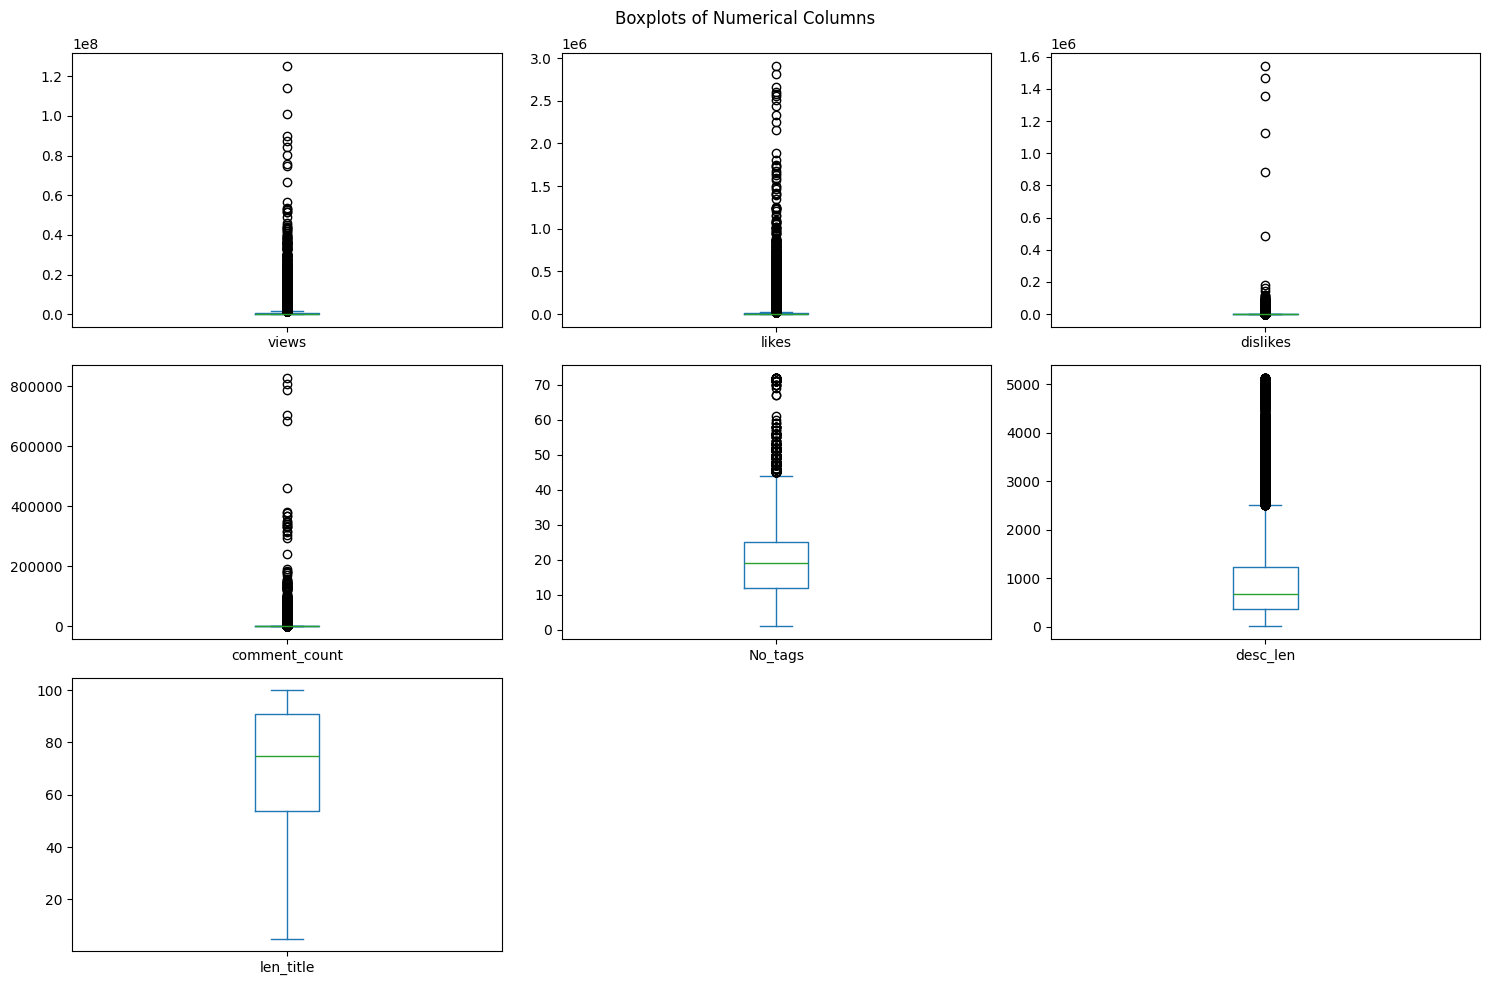

In [ ]:
#Diagram Boxplot
# Ambil hanya kolom numerik dari DataFrame
numerical_df = df.select_dtypes(include=['int64'])

# Buat boxplot untuk semua kolom numerik
numerical_df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False, sharey=False)

plt.suptitle('Boxplots of Numerical Columns')
plt.tight_layout()
plt.show()

Insight : Secara umum, hampir semua boxplot menunjukkan banyak outlier (titik-titik di atas whisker), menandakan bahwa sebagian besar data berada di rentang rendah, tapi ada nilai-nilai ekstrem yang sangat tinggi. Hanyak kolom len_title dan no_tags yang cenderung normal dengan sedikit outliers.

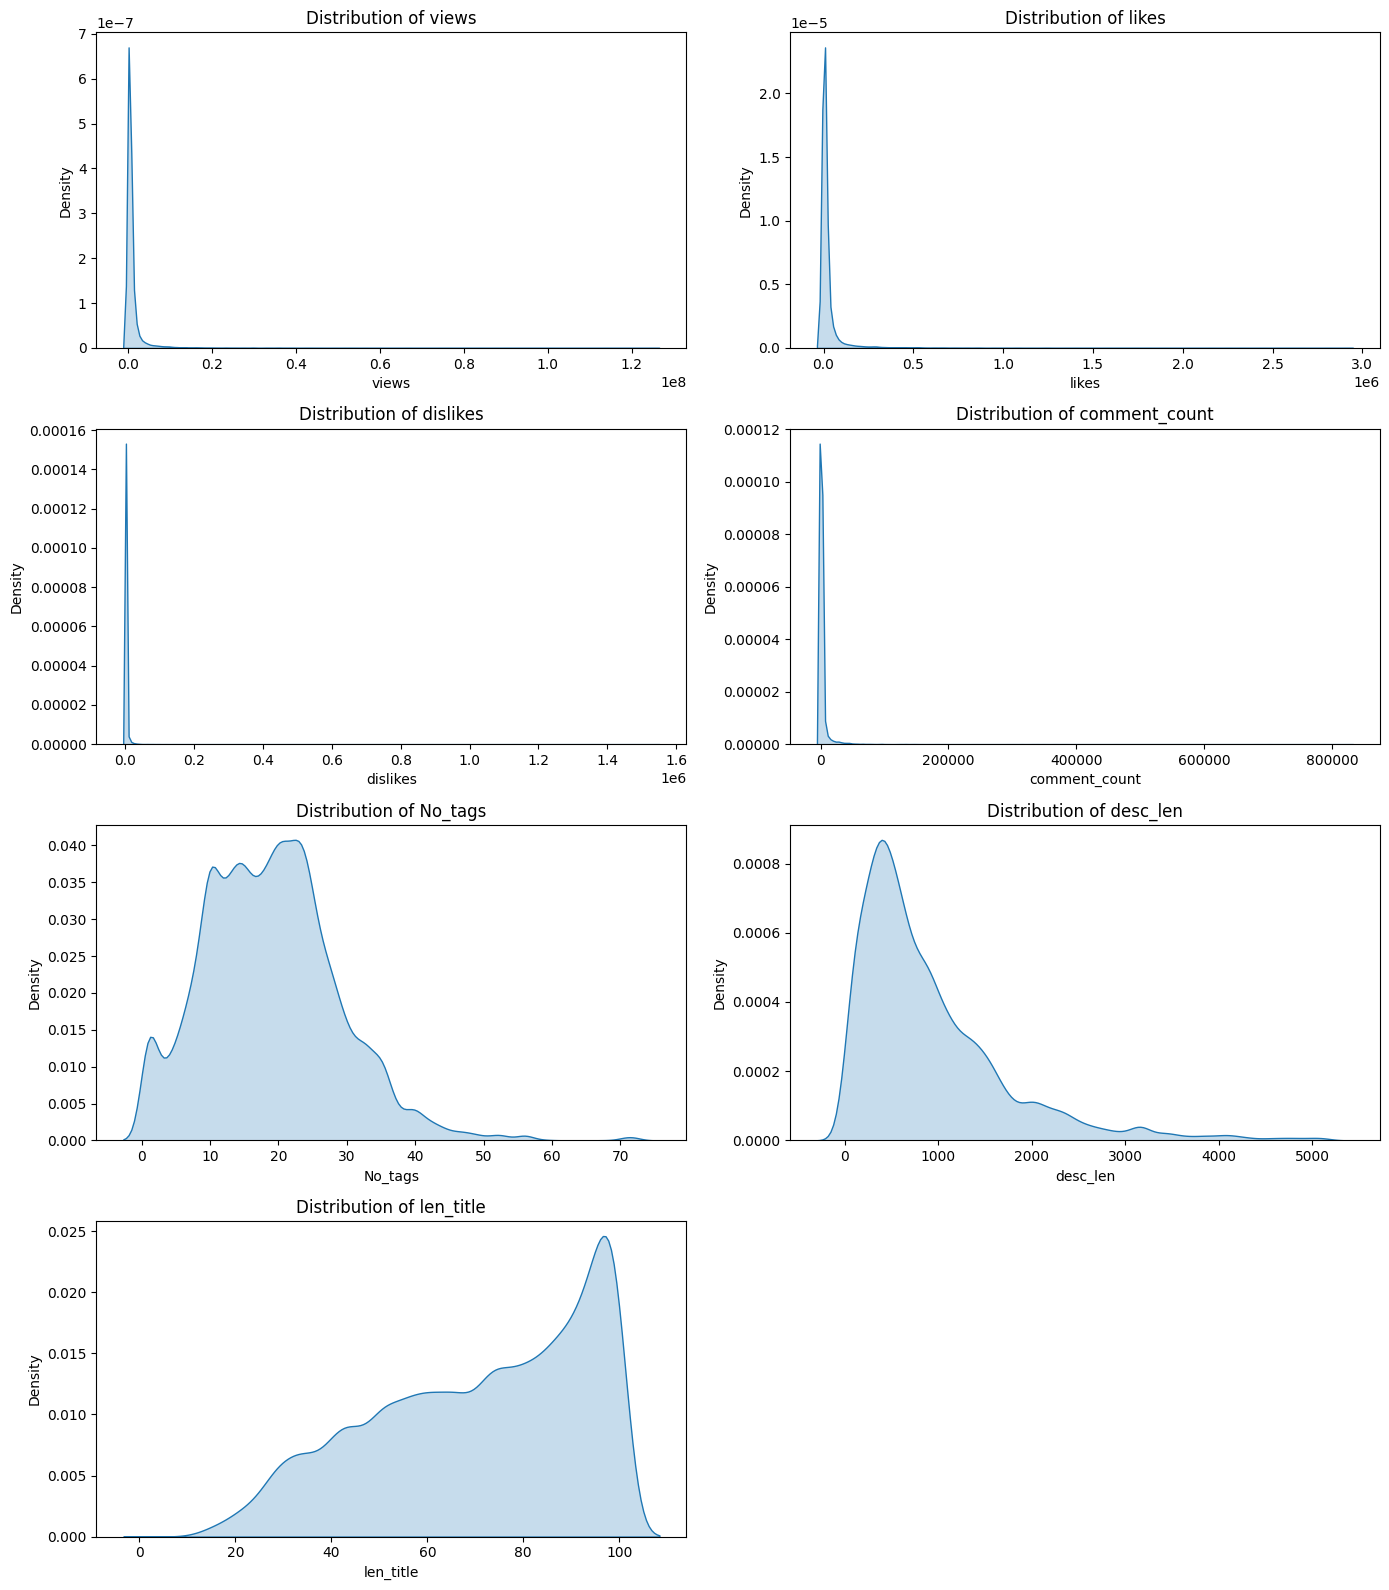

In [ ]:
#Diagram Kde plot
# Ambil hanya kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Jumlah subplot
n_cols = 2  # 2 kolom
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Buat subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))
axes = axes.flatten()  # Supaya bisa diakses pakai indeks 1D

# Loop setiap kolom numerik
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=df, x=col, fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Jika subplot lebih banyak dari jumlah kolom, hapus sisa axis
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Insight :  distribusi masing-kolom terlihat didominasi right-skewed, Hanya No_tags dan len_title yang mendekati normal

#Multivariate Analysis

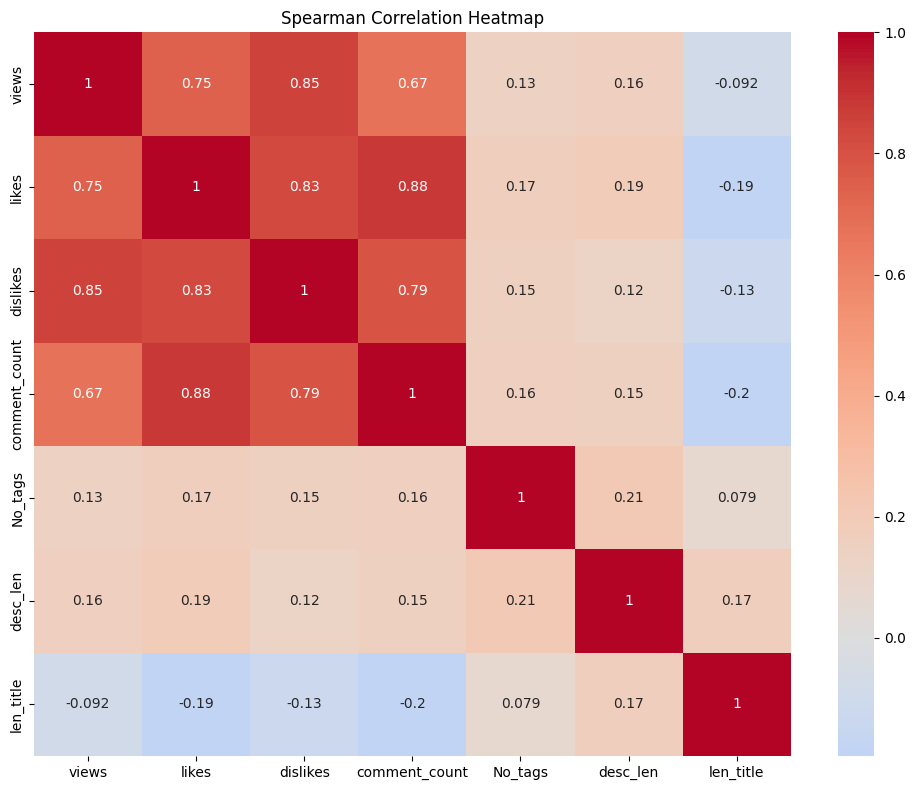

In [ ]:
#Membuat Heatmap

# Hitung korelasi menggunakan metode Spearman
corr_spearman = df[nums].corr(method='spearman')

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.tight_layout()
plt.show()

Insight :

Hubungan fitur dengan target (views)<br>
views punya hubungan sangat kuat dan positif dengan likes, dislikes, dan comment_count. Artinya, ketiga fitur ini bisa menjadi prediktor yang baik dalam model regresi. Untuk fitur desc_len, No_tags, dan len_title berkorelasi rendah terhadap nilai views  menandakan ada sedikit pengaruh antara jumlah tags dan descripsi di video dengan jumlah views.

Hubungan antar fitur<br>
korelasi yg tinggi diatas 0,7 yaitu antara fitur likes, dislikes, dan comment_count mungkin bisa dihapus dan diplih hanya satu atau dibuat fitur tambahan dari 3 kolom tersebut. Untuk hubungan antar fitur yang lain cenderung rendah.

#Handling Outliers

In [ ]:
#Handling Outliers dengan metode IQR
import pandas as pd

# Misalnya df adalah DataFrame kamu

def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df
#Kolom yang inging dibersihkan
columns_to_clean = ['views', 'likes', 'dislikes', 'comment_count', 'desc_len']
# Bersihkan outlier
df_clean = remove_outliers_iqr(df, columns_to_clean)


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19994 entries, 1 to 36737
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           19994 non-null  datetime64[ns]
 1   title                   19994 non-null  object        
 2   channel_title           19994 non-null  object        
 3   category_id             19994 non-null  object        
 4   publish_time            19994 non-null  object        
 5   tags                    19994 non-null  object        
 6   views                   19994 non-null  int64         
 7   likes                   19994 non-null  int64         
 8   dislikes                19994 non-null  int64         
 9   comment_count           19994 non-null  int64         
 10  comments_disabled       19994 non-null  bool          
 11  ratings_disabled        19994 non-null  bool          
 12  video_error_or_removed  19994 non-null  bool       

#Feature Selection

Untuk fitur selection digunakan Anova untuk melihat hubungan linear fitu-fitur dengan kolom target yaitu views yang berupa numerik.

- Semakin tinggi F_score yang dihasilkan semakin membuktikan pengaruh terhadap target kolom.
- Semakin kecil p-value (<0,05), semakin kuat bukti bahwa fitur tersebut memang berpengaruh signifikan terhadap target. Nilai p-value menyatakan peluang bahwa hubungan antara fitur dan target terjadi karena kebetulan semata (null hypothesis).

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# kolom nums_update
#X = df[['likes', 'No_tags', 'desc_len', 'len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']].copy()
X = df_clean[['likes', 'No_tags', 'desc_len', 'len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']].copy()

# Pastikan semua diubah ke numerik
X = X.astype(int)

# Target kolom numerik
#y = df['views']
y = df_clean['views']

# ANOVA F-test
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

# Lihat hasil
scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector.scores_,
    'p_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

print(scores)

                  Feature      F_Score       p_Value
0                   likes  4840.599507  0.000000e+00
2                desc_len    46.588308  9.009094e-12
1                 No_tags    36.771242  1.352204e-09
3               len_title     1.923850  1.654483e-01
5        ratings_disabled     0.637877  4.244901e-01
4       comments_disabled     0.220285  6.388278e-01
6  video_error_or_removed     0.000000  1.000000e+00


Berdasarkan hasil analisi anova didapatkan fitur dengan nilai F_score paling tinggi yaitu likes dan paling rendah yaitu video_error_or_removed. Dari analisis tersebut fitur video_error_or_removed bisa dihapus karena memilki nilai f_score yang rendah dan nilai P-value>0.05 membuktikan kurang berhubungan dengan fitur target.

##Kesimpulan saran fitur yang dipertahankan :

- Views (kolom target)
- likes
- desc_len
- No_tags
- len_title
- ratings_disabled
- comments_disabled
- publish_time (fitur tambahan, untuk ekstrak jam upload)
- publish_date (fitur tambahan, untuk ekstrak hari biasa atau weakend)

In [ ]:
#Cek isi fitur kategorikal
for col in cats:
  print(f'''value count kolom {col}:''')
#  print(df[col].value_counts())
  print(df_clean[col].value_counts())
  print('----'*10, '\n')

value count kolom title:
title
Nandhini | Today @ 9 pm | Sun TV                                                                 15
Kasthooriman || General Promo || Mon to Sat at 8:30 PM || Asianet                                 9
Karuthamuthu || General Promo || Mon to Sat at 8 PM || Asianet                                    7
10 AWESOME LIFE HACKS!                                                                            7
Mogalirekulu | Today @ 1 30 PM | Gemini TV                                                        7
                                                                                                 ..
అలా కాదు తల్లి..  గిడ్డి ఈశ్వరికి వైఎస్ జగన్‌ ఫోన్| ys jagan phone call to giddi eswari           1
Faisla Gujarat Ka: BJP will get nothing less than 150 seat in Gujarat Poll, says Paresh Rawal     1
Deivamagal Episode 1400, 28/11/17                                                                 1
Fun Bucket JUNIORS | Episode 36 | Kids Funny Videos | Comedy Web Seri

#Feature Engineering

In [ ]:
# Feature Tambahan

# Gabungkan publish_date dan publish_time secara benar
df_clean['publish_datetime'] = pd.to_datetime(df_clean['publish_date'].astype(str) + ' ' + df_clean['publish_time'].astype(str))

# 1. Fitur publish_hour (jam upload)
df_clean['publish_hour'] = df_clean['publish_datetime'].dt.hour

# 2. Fitur is_weekend (apakah Sabtu/Minggu)
df_clean['is_weekend'] = df_clean['publish_datetime'].dt.dayofweek >= 5  # Sabtu = 5, Minggu = 6


# Tampilkan 10 baris pertama dari fitur-fitur baru
print(df_clean[['publish_hour', 'is_weekend']].head(10))


    publish_hour  is_weekend
1              5       False
2             15        True
4              1       False
8              4       False
12             9       False
13            19        True
15             6       False
23            16        True
25            15        True
26             4        True


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19994 entries, 1 to 36737
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           19994 non-null  datetime64[ns]
 1   title                   19994 non-null  object        
 2   channel_title           19994 non-null  object        
 3   category_id             19994 non-null  object        
 4   publish_time            19994 non-null  object        
 5   tags                    19994 non-null  object        
 6   views                   19994 non-null  int64         
 7   likes                   19994 non-null  int64         
 8   dislikes                19994 non-null  int64         
 9   comment_count           19994 non-null  int64         
 10  comments_disabled       19994 non-null  bool          
 11  ratings_disabled        19994 non-null  bool          
 12  video_error_or_removed  19994 non-null  bool       

Berikut adalah alasan penting mengapa setiap fitur tambahan di buat sangat relevan untuk meningkatkan performa prediksi views:

1. 📅 publish_hour – Jam Upload Video
Alasan:
* Waktu publikasi sangat memengaruhi jumlah penonton awal.

* Misalnya, video yang dirilis pada jam sibuk (seperti sore hari atau malam hari) cenderung memiliki lebih banyak viewers aktif dibandingkan video yang tayang dini hari.

* Bisa menangkap pola perilaku pengguna YouTube dalam sehari.

2. 📆 is_weekend – Akhir Pekan atau Hari Biasa
Alasan:

* Pengguna biasanya memiliki waktu lebih banyak untuk menonton video saat akhir pekan.

* Video yang diunggah pada Sabtu/Minggu bisa memiliki peluang lebih tinggi untuk mendapatkan views.

* Membantu membedakan dinamika penayangan berdasarkan pola mingguan.

#Kesimpulan:

Fitur-fitur ini membantu:

* Menangkap pola perilaku pengguna berdasarkan waktu,

* Memberikan sinyal tambahan yang tidak langsung terlihat hanya dari variabel dasar.

* Jika model hanya melihat title, tags, atau category saja tanpa mempertimbangkan kapan dan bagaimana video dirilis, maka ia akan kehilangan informasi penting tentang perilaku pengguna YouTube.

#Drop kolom yang tidak diperlukan

In [ ]:
#drop kolom
df_clean.drop(columns=['publish_time', 'publish_date', 'trending_date', 'publish_datetime','tags','title',
                       'channel_title', 'video_error_or_removed', 'category_id', 'description' ], inplace=True)

In [ ]:
df_clean = df_clean.astype(int)

In [ ]:
#Hasil akhir fitur
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19994 entries, 1 to 36737
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   views              19994 non-null  int64
 1   likes              19994 non-null  int64
 2   dislikes           19994 non-null  int64
 3   comment_count      19994 non-null  int64
 4   comments_disabled  19994 non-null  int64
 5   ratings_disabled   19994 non-null  int64
 6   No_tags            19994 non-null  int64
 7   desc_len           19994 non-null  int64
 8   len_title          19994 non-null  int64
 9   publish_hour       19994 non-null  int64
 10  is_weekend         19994 non-null  int64
dtypes: int64(11)
memory usage: 1.8 MB


#Scalling Data

In [ ]:
# Import library untuk scaling data
from sklearn.preprocessing import RobustScaler

# Inisialisasi objek RobustScaler
scaler = RobustScaler()

# Fit dan transform data pada dataframe
scaled_data = scaler.fit_transform(df_clean)

# Membuat dataframe baru dengan data yang telah discaling
data_olah = pd.DataFrame(scaled_data, columns=df_clean.columns)

# Tampilkan data
data_olah.head(5)

,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,No_tags,desc_len,len_title,publish_hour,is_weekend
0,1.826121,-0.168763,3.192469,-0.454887,1.0,0.0,0.142857,2.437870,-0.575758,-0.750,0.0
1,1.334230,0.348884,0.426778,0.105263,0.0,0.0,-0.214286,-0.150888,-0.575758,0.500,1.0
2,1.291981,-0.267343,0.635983,-0.206767,0.0,0.0,-0.428571,0.250000,0.333333,-1.250,0.0
3,-0.172901,-0.255984,-0.368201,-0.368421,0.0,0.0,0.285714,-0.110947,0.606061,-0.875,0.0
4,-0.012506,-0.176471,-0.368201,-0.454887,1.0,0.0,0.214286,0.405325,0.242424,-0.250,0.0


#Data Splitting

In [ ]:
# Import library untuk splitting data
from sklearn.model_selection import train_test_split

# Definisikan fitur dan target
X = data_olah.drop(columns = 'views')
y = data_olah['views']

# Proses splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.20,
    random_state = 42
)

# Periksa banyak data masing-masing
print(f'Banyak data latih = {X_train.shape[0]}')
print(f'Banyak data test  = {X_test.shape[0]}')

Banyak data latih = 15995
Banyak data test  = 3999


#Simpan CSV

In [ ]:
#Gabungkan kembali X dan y agar bisa disimpan dalam satu CSV
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Simpan ke file CSV
train_data.to_csv('data_train.csv', index=False)
test_data.to_csv('data_test.csv', index=False)

print("Data training dan testing telah disimpan sebagai 'data_train.csv' dan 'data_test.csv'")

Data training dan testing telah disimpan sebagai 'data_train.csv' dan 'data_test.csv'


#Training & Evaluasi Model

In [ ]:
# Import library untuk regresi linear dan evaluasi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Tambahkan numpy untuk sqrt

# Inisialisasi dan latih model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Hitung RMSE dari MSE
r2 = r2_score(y_test, y_pred)

print("Linier Regression Results:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


Linier Regression Results:
Root Mean Squared Error (RMSE): 0.68
R-squared (R²): 0.54


### Dengan nilai tersebut, kemungkinan model underfitting dan variansi rendah. maka akan dicoba menggunakanmodel lain.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Inisialisasi dan latih model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_rf = rf_model.predict(X_test)

# Evaluasi model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor Results:")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


Random Forest Regressor Results:
Root Mean Squared Error (RMSE): 0.55
R-squared (R²): 0.70


### Dari model Random Forest Regressor tersebut, hasil tersebut lebih baik dari hasil sebelumnya (model Linier Regression) :
RMSE turun dari 0.68 → 0.55 → prediksi lebih akurat.

R² naik dari 0.54 → 0.70 → model sekarang bisa menjelaskan 70% variasi data

Nilai akurasi model ini cukup mewakili. Untuk itu perlu dilakukan hyperparameter tuning untuk melihat apakah akurasi dari model masih dapat ditingkatkan.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # pakai RMSE
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print("Best Tuned Random Forest:")
print("Best Params:", grid_search.best_params_)
print(f"RMSE: {rmse_best:.2f}")
print(f"R²: {r2_best:.2f}")


Best Tuned Random Forest:
Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
RMSE: 0.55
R²: 0.70


###Untuk pembanding terhadap model Random Forest Regressor, dilakukan prediksi menggunakan model lain yaitu Gradient Boosting Regressor (XGBoost)

In [ ]:
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Inisialisasi dan latih model XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi pada data test
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Gradient Boosting Regressor (XGBoost) Results:")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")
print(f"R-squared (R²): {r2_xgb:.2f}")

Gradient Boosting Regressor (XGBoost) Results:
Root Mean Squared Error (RMSE): 0.56
R-squared (R²): 0.69


### Melihat hasil RMSE dan R² Gradient Boosting Regressor (XGBoost) yang hampir mirip dengan Random Forest Regressor, maka perlu dipertimbangkan untuk melakukan hyperparameter tuning dari Gradient Boosting Regressor (XGBoost) untuk melihat perbaikan akurasi modelnya

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Hyperparameter Tuning untuk XGBoost
param_dist_xgb = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 15),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 0.5)
}

# Inisialisasi dan latih model XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# 🔍 Randomized Search untuk XGBoost
rs_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, n_iter=50, scoring='neg_mean_absolute_error',
                            cv=5, n_jobs=-1, random_state=42)
rs_xgb.fit(X_train, y_train)

# Prediksi pada data test
best_xgb = rs_xgb.best_estimator_

# Evaluasi model terbaik
y_pred_best = best_xgb.predict(X_test)

# Evaluasi model
rmse_xgb_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_xgb_best = r2_score(y_test, y_pred_best)

print("Best Tune Gradient Boosting Regressor Results:")
print("\nBest params for XGBoost:", rs_xgb.best_params_)
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_best:.2f}")
print(f"R-squared (R²): {r2_xgb_best:.2f}")

Best Tune Gradient Boosting Regressor Results:

Best params for XGBoost: {'colsample_bytree': np.float64(0.6467440873590191), 'gamma': np.float64(0.007039911357542228), 'learning_rate': np.float64(0.06965272122664154), 'max_depth': 10, 'min_child_weight': 3, 'n_estimators': 212, 'subsample': np.float64(0.9085081386743783)}
Root Mean Squared Error (RMSE): 0.50
R-squared (R²): 0.75


#Kesimpulan
1.   Dalam kondisi model tanpa hyperparameter tuning, akurasi model Random Forest Regressor mengalahkan model Linier Regression dan Gradient Boosting Regressor.<br>
Dimana nilai RMSE dan R² untuk  Random Forest Regressor, Linier Regression dan Gradient Boosting Regressor masing-masing sebesar:<br>
[0.55, 0.70], [0.68, 0.54], [0.56, 0.69]
2.   Dari model-model tersebut di pilih 2 model untuk dilakukan hyperparameter tuning untuk meningkatkan akurasi dari model, yaitu Random Forest Regressor, dan Gradient Boosting Regressor dengan pertimbangan utama nilai RMSE yang kecil dan R² yang diatas 0.65. <br>
Dengan hasil akurasi RMSE dan R² setelah hyperparameter tuning berturut-turut untuk Random Forest Regressor, dan Gradient Boosting Regressor sebesar:<br>
[0.55, 0.70], [0.50, 0.75]
3.   Hasil hyperparameter tuning dari Random Forest Regressor tidak menunjukkan perubahan akurasi, sedangkan hasil hyperparameter tuning dari Gradient Boosting Regressor menunjukkan peningkatan akurasi yang lumayan dimana RMSE dari 0.56 menjadi 0.50 dan R² dari 0.69 menjadi 0.75
4.   Berdasarkan ini, untuk pemodelan prediksi jumlah viewer Youtube lebih bisa diwakili oleh model Gradient Boosting Regressor yang sudah dilakukan hyperparameter tuning

